In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def pkt_toolate(path):
    gw = gw1 = open(path,"r")
    prop = []
    req  = []
    rej  = []
    
    for line in gw:
        idx = line.find("(too late): ")
        if idx != -1:
            idx2 = line.find(",")
            idx3 = line.find("req:")
            idx4 = line.find("%")
            #print(line[idx+12:idx4])
            #print(line[idx3+4:idx2])
            #print(line[idx2+6:-2])
            #print(line)
            prop.append((float)(line[idx+12:idx4]))
            req.append((int)(line[idx3+4:idx2]))
            rej.append((int)(line[idx2+6:-2]))

    # Data for plotting
    plt.figure(figsize=(12,8), dpi=180)
    t = []
    for i in range(len(prop)):
        t.append(i*30/60)
    #s = 1 + np.sin(2 * np.pi * t)

    fig, ax = plt.subplots()
    ax.plot(t, prop)

    ax.set(xlabel='time (min)', ylabel='too late error percentage', title='Too Late percentage')
    ax.grid()
    fig.savefig("/Users/gexin/Desktop/test_data/result_6.png")
    plt.show()            

<Figure size 2160x1440 with 0 Axes>

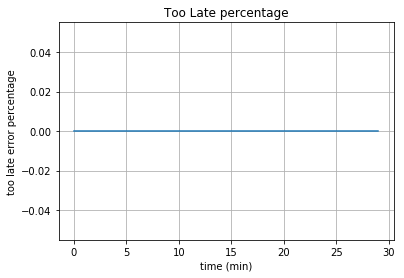

In [11]:
pkt_toolate("/Users/gexin/Desktop/test_data/0305_2.txt")

In [8]:
def timediff(path):
    gw = gw1 = open(path,"r")
    cur = []
    pkt = []
    diff = []
    pos = []
    for line in gw:
        if line.find("already too late to send it") != -1:
            p1 = line.find("current=")
            p2 = line.find(", packet=")
            p3 = line.find(", type=0")
            #print(line[p1+8:p2])
            #print(line[p2+9:p3])
            cur.append(int(line[p1+8:p2]))
            pkt.append(int(line[p2+9:p3]))
            tmp = (pkt[-1] - cur[-1])
            if tmp < 2000000 and len(diff) < 10000:
                diff.append(tmp/1000)
            else:
                pos.append(len(diff))
                
    print(len(diff))
    print(pos)
    plt.figure(figsize=(16,9), dpi=200)
    t = []
    for i in range(len(diff)):
        t.append(i+1)
    #s = 1 + np.sin(2 * np.pi * t)

    fig, ax = plt.subplots()
    ax.plot(t, diff)
    ax.set(xlabel='cnt', ylabel='time diff (ms)', title='Too Late time diff')
    ax.grid()
    fig.savefig("/Users/gexin/Desktop/test_data/result_5.png")
    plt.show()            

132
[]


<Figure size 3200x1800 with 0 Axes>

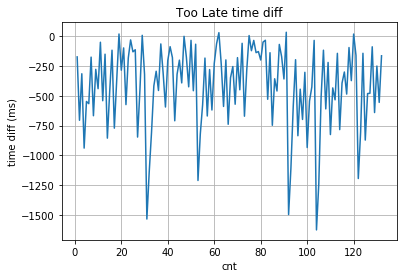

In [9]:
timediff("/Users/gexin/Desktop/test_data/0305_1.txt")